In [5]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Reading data
app_train = pd.read_csv('./application_train.csv')
app_test = pd.read_csv('./application_test.csv')

In [7]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [11]:
#Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data ???
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
le.classes_

array(['N', 'Y'], dtype=object)

In [14]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [15]:
train_labels = app_train['TARGET']

In [16]:
# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [17]:
app_train.drop(['TARGET'],axis="columns",inplace=True)

In [18]:
#Séparation des Dataframe 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (app_train,train_labels,stratify=train_labels,test_size=0.25,random_state=42)

In [19]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_test',y_train.shape)
print('y_test',y_test.shape)

X_train (230633, 239)
X_test (76878, 239)
y_test (230633,)
y_test (76878,)


In [20]:
round(y_test.value_counts(normalize=True),4)==round(y_train.value_counts(normalize=True),4)

0    True
1    True
Name: TARGET, dtype: bool

In [62]:
y_test.value_counts(normalize=1)

0    0.919275
1    0.080725
Name: TARGET, dtype: float64

In [22]:
# Add the target back in
app_train['TARGET'] = train_labels

### Logistic Regression Implementation¶

Nous utiliserons toutes les fonctionnalités après avoir codé les variables catégorielles. Nous prétraiterons les données en complétant
- Les valeurs manquantes (imputation) CAR les estimateurs de scikit-learn sont incompatibles avec des dataset avec des valeurs manquantes 
- et en normalisant la gamme des caractéristiques (mise à l'échelle des caractéristiques). Le code suivant exécute ces deux étapes de prétraitement.


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)
imputer.fit(X_train)
imputer.fit(X_test)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
print('train_labels',train_labels.shape)
print('X_train',X_train.shape)
print('X_test',X_test.shape)


Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)
train_labels (307511,)
X_train (230633, 239)
X_test (76878, 239)


Nous utiliserons LogisticRegressionfrom Scikit-Learn pour notre premier modèle. La seule modification que nous apporterons par rapport aux paramètres par défaut du modèle est d'abaisser le paramètre de régularisation, C, qui contrôle la quantité de sur apprentissage (une valeur inférieure devrait diminuer le sur apprentissage). Cela nous permettra d'obtenir des résultats légèrement meilleurs que la LogisticRegression par défaut, mais cela placera tout de même la barre plus bas pour tous les modèles futurs.
Nous utilisons ici la syntaxe de modélisation familière de Scikit-Learn : nous créons d'abord le modèle, puis nous l'entraînons à l'aide de .fit et nous faisons ensuite des prédictions sur les données de test à l'aide de .predict_proba (rappelez-vous que nous voulons des probabilités et non un 0 ou un 1).

In [24]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)


LogisticRegression(C=0.0001)

In [25]:
log_reg.score(X_test,y_test)

0.9192746949712531

In [26]:
logreg = LogisticRegression(C = 0.0001)

In [27]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.0001)

In [28]:
predictions = logreg.predict(X_test)

In [29]:
logreg.score(X_test,predictions)

1.0

In [30]:
from sklearn import metrics
metrics.confusion_matrix (predictions,y_test)

array([[70672,  6206],
       [    0,     0]])

In [32]:
metrics.confusion_matrix (y_test,predictions)

array([[70672,     0],
       [ 6206,     0]])

# Improved Model: Random Forest

Pour essayer de battre les mauvaises performances de notre base de référence, nous pouvons mettre à jour l'algorithme. Essayons d'utiliser une forêt aléatoire sur les mêmes données d'entraînement pour voir comment cela affecte les performances. Le Random Forest est un modèle beaucoup plus puissant, surtout lorsque nous utilisons des centaines d'arbres. Nous utiliserons 100 arbres dans la forêt aléatoire

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [34]:
# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.6s finished


In [36]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[70669     3]
 [ 6199     7]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70672
           1       0.70      0.00      0.00      6206

    accuracy                           0.92     76878
   macro avg       0.81      0.50      0.48     76878
weighted avg       0.90      0.92      0.88     76878

0.9193267254611203


In [38]:
np.bincount(y_pred)

array([76868,    10])

In [39]:
pd.DataFrame(y_pred).value_counts(normalize=0)

0    76868
1       10
dtype: int64

In [40]:
y_test.value_counts(normalize=0)

0    70672
1     6206
Name: TARGET, dtype: int64

In [41]:
from sklearn.metrics import roc_auc_score
probas = random_forest.predict_proba(X_test)
roc_auc_score (y_test,probas[:, 1])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished


0.7085890555861466

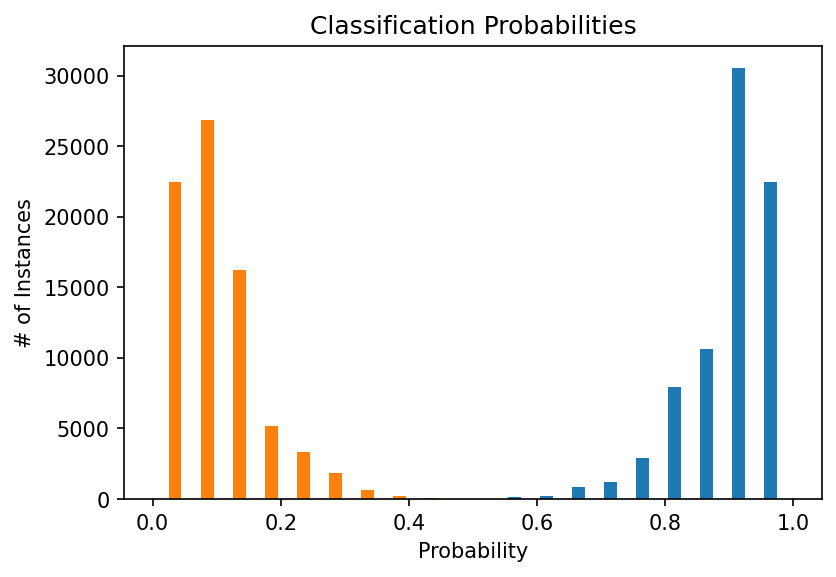

In [51]:
# get the probability distribution
#probas = rf_clf.predict_proba(X_test)
# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
#plt.xlim([0, 1.0])
#plt.legend(target_names)
plt.show()

In [48]:
probas

array([[0.69, 0.31],
       [0.87, 0.13],
       [0.94, 0.06],
       ...,
       [0.83, 0.17],
       [0.87, 0.13],
       [0.85, 0.15]])

## Courbe de ROC

### regarder : https://medium.com/cascade-bio-blog/making-sense-of-real-world-data-roc-curves-and-when-to-use-them-90a17e6d1db


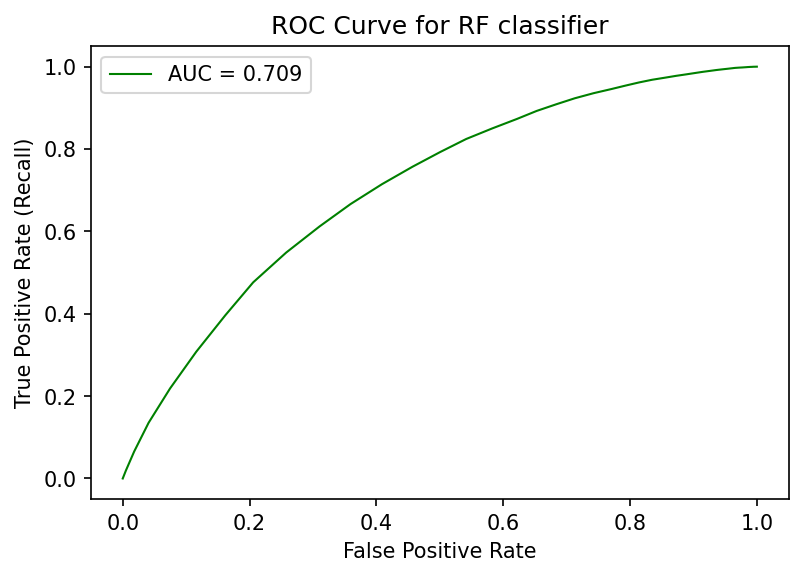

In [55]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

## Precision-Recall (PR) curve

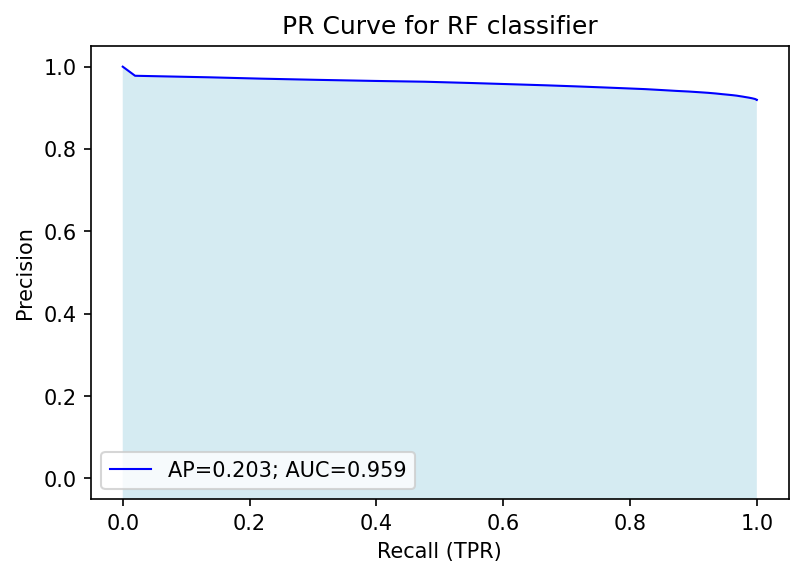

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

### Modelisation de la fonction de coût
##### notre Modèle : à une précision à 70%, le pourcentage de clients ne remboursant pas leur prêt est de 8%. Compte tenu de cette situation 

In [59]:
import argparse
import numpy as np


def confusion_matrix(acc:float=0.995, subpop:float=1e-4, population:float=8.5e6) -> dict:
    """
    Generates confusion matrix and derived variables
    based on accuracy of detecting a fraction (subpop) of a population 
    Args:
        acc (float):    accuracy of detecting subpop (0-1)
        subpop (float): fraction of population in subpopulation (0-1)
        population (float): Total population size (absolute number)
        
    Returns:
        dict: derived variables as a dictionary
    """

    # Inputs
    population = int(population)
    print(f"\nInputs\n------------")
    print(f"Accuracy (%): {100*acc}")
    print(f"Subpopulation (%): {100*subpop}")
    print(f"Population size: {population}")
    print(f"Predicted subpopulation size: {int(subpop*population)}")

    # Check variables
    if acc > 1 or acc < 0:
        print("\nERROR: give valid accuracy (0 to 1).")
        return
    if subpop > 1 or subpop < 0:
        print("\nERROR: give valid subpop percent (0 to 1).")
        return
    if population < 1:
        print("\nERROR: cannot have zero or negative populations.")
        return

    # confusion matrix
    tp = np.rint(population*subpop*acc).astype(int)
    fp = np.rint(population*(1-acc)).astype(int)
    tn = np.rint(population*(1-subpop)*acc).astype(int)
    fn = np.rint(population*subpop).astype(int) - tp
    print(f"\nResults\n------------")
    print(f"True Positives (Power): {tp}")
    print(f"False Positives (Type I): {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives (Type II): {fn}")

    # derivations
    round_var = 4 # round vars to this place
    tpr = np.round((tp)/(tp+fn), round_var)
    fpr = np.round((fp)/(fp+tn), round_var)
    precision = np.round((tp)/(tp+fp), round_var)
    specificity = np.round((tn)/(tn+fp), round_var)
    fdr = np.round((fp)/(fp+tp), round_var)
    fscore = np.round(2*tp/(2*tp+fp+fn), round_var)
    print(f"\nDerivations\n------------")
    print(f"True Positive Rate (Recall): {tpr}")
    print(f"False Positive Rate: {fpr}")
    print(f"Precision: {precision}")
    print(f"Specificity: {specificity}")
    print(f"False Discovery Rate: {fdr}")
    print(f"F-Score: {fscore}")

    # output a dictionary of derived variables
    output = {
        'True_Positives':tp,
        'False_Positives':fp,
        'True_Negatives':tn,
        'False_Negatives':fn,
        'TPR':tpr,
        'FPR':fpr,
        'Precision':precision,
        'Specificity':specificity,
        'FDR':fdr,
        'FScore':fscore
    }

    return output 

In [60]:

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("-a", "--acc", type=float, default=0.995, help="Accuracy (0 -> 1)")
    parser.add_argument("-s", "--sub", type=float, default=1e-4, help="Subpop fraction (0 -> 1)")
    parser.add_argument("-p", "--pop", type=float, default=8.5e6, help="Pop size")
    args = parser.parse_args()
    accuracy = args.acc
    subpopulation = args.sub
    population = args.pop


usage: ipykernel_launcher.py [-h] [-a ACC] [-s SUB] [-p POP]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/francois/Library/Jupyter/runtime/kernel-a2c0ad1e-c76a-496c-bfb5-3405618dee66.json


SystemExit: 2

In [61]:

    # main
    confusion_matrix(0.7,0.08,500000)


Inputs
------------
Accuracy (%): 70.0
Subpopulation (%): 8.0
Population size: 500000
Predicted subpopulation size: 40000

Results
------------
True Positives (Power): 28000
False Positives (Type I): 150000
True Negatives: 322000
False Negatives (Type II): 12000

Derivations
------------
True Positive Rate (Recall): 0.7
False Positive Rate: 0.3178
Precision: 0.1573
Specificity: 0.6822
False Discovery Rate: 0.8427
F-Score: 0.2569


{'True_Positives': 28000,
 'False_Positives': 150000,
 'True_Negatives': 322000,
 'False_Negatives': 12000,
 'TPR': 0.7,
 'FPR': 0.3178,
 'Precision': 0.1573,
 'Specificity': 0.6822,
 'FDR': 0.8427,
 'FScore': 0.2569}

In [63]:
# quel est le montant moyen d'un crédit ?